<a href="https://colab.research.google.com/github/jaalvaradoh/s3_iris/blob/main/s3_iris_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*zomnCz8-VMgrSV8eLCx2tw.gif" width="200" alt="molecula"  />

$$\Large \textit{Cuaderno de Código #1 | Sesión Nº 3}$$

---
$$\large\textbf{Desarrollo de Modelo de Clasificación}$$

---
$$\textit{+ Actividad 2}$$

<br>
<br>

__Dr. Jesus Alvarado-Huayhuaz__

---



# Desarrollo de modelos de IA

## Requerimientos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de datos

In [2]:
from sklearn import datasets

In [42]:
iris = datasets.load_iris()

In [43]:
help(iris)

Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |
 |  Container object exposing keys as attributes.
 |
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __dir__(self)
 |      Default dir() implementation.
 |
 |  __getattr__(self, key)
 |
 |  __getitem__(self, key)
 |      Return self[key].
 |
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __setattr__(self, key, value)
 |      Implem

## Exploración de datos

### ¿Qué información contiene el dataset?

In [44]:
# Veamos el contenido general del dataset

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
# Nombres de las columnas

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
# Veamos las especies

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### ¿Cómo veo la data de forma tabular?

In [47]:
# Creamos un dataframe usando pandas

df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [48]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### ¿Cómo agregamos el target en la data tabular?

In [49]:
df["target"] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### ¿Cómo vemos los diferentes datos en el target?

In [50]:
df["target"].value_counts()

,count
target,
0,50
1,50
2,50


### ¿Qué tipos de datos son?

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### ¿Qué medidas de tendencia encontramos?

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


### ¿Cómo están distribuidos los datos?

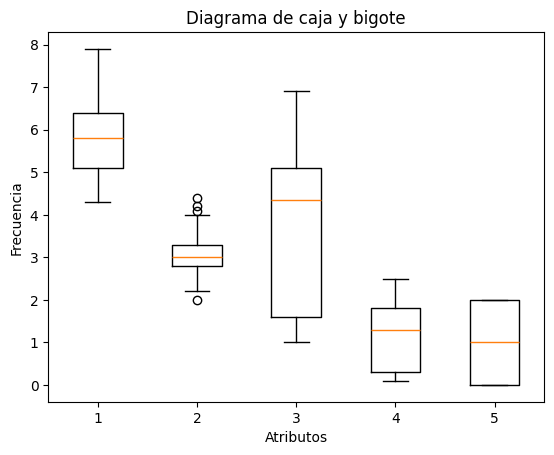

In [53]:
# Diagrama de caja
plt.boxplot(df)
plt.xlabel("Atributos")
plt.ylabel("Frecuencia")
plt.title("Diagrama de caja y bigote")
plt.show()

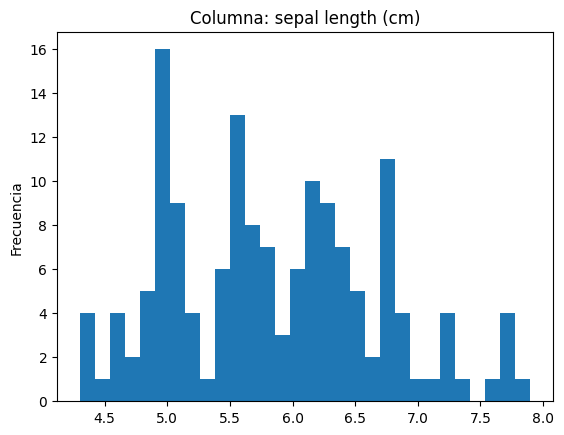

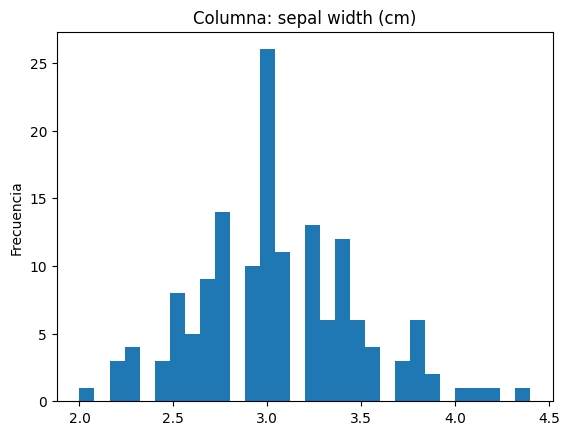

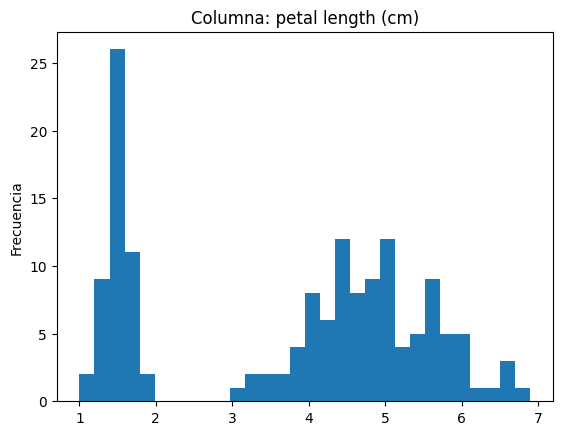

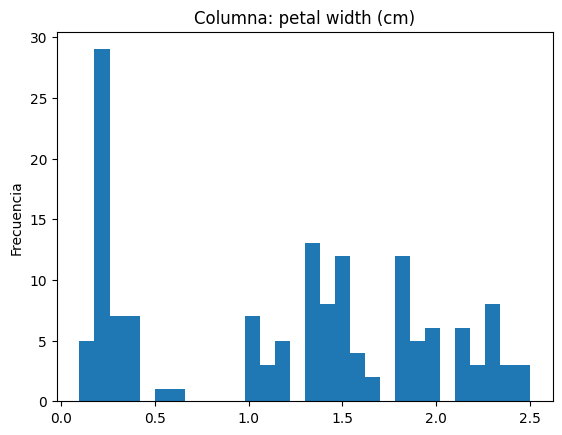

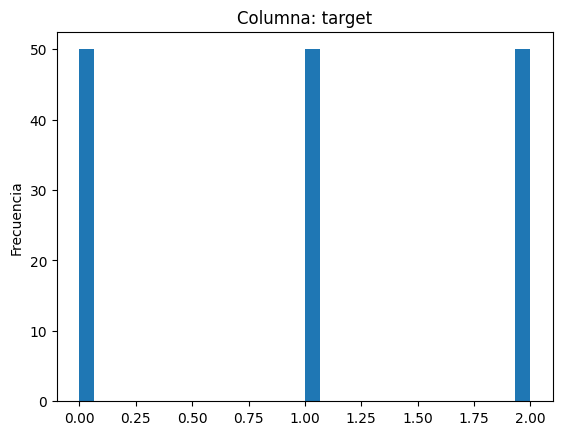

In [54]:
# Diagrama de barras: Frecuencia de los datos

for i in df.columns:
    plt.hist(df[i], bins=30)
    plt.ylabel("Frecuencia")
    plt.title(f"Columna: {i}")
    plt.show()

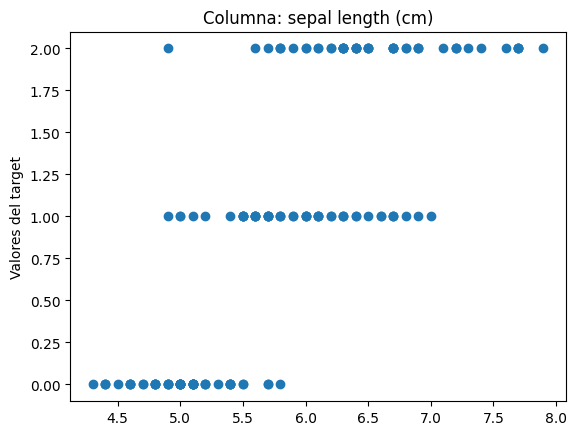

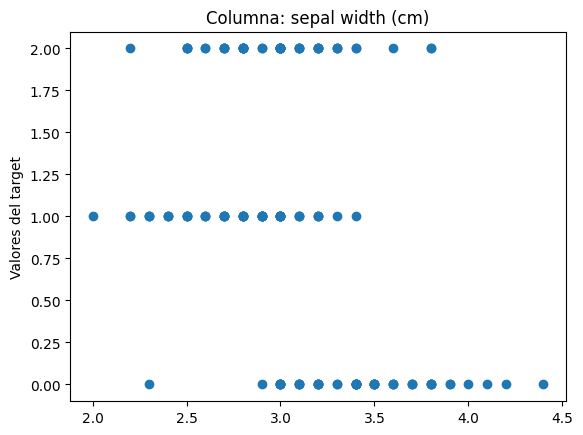

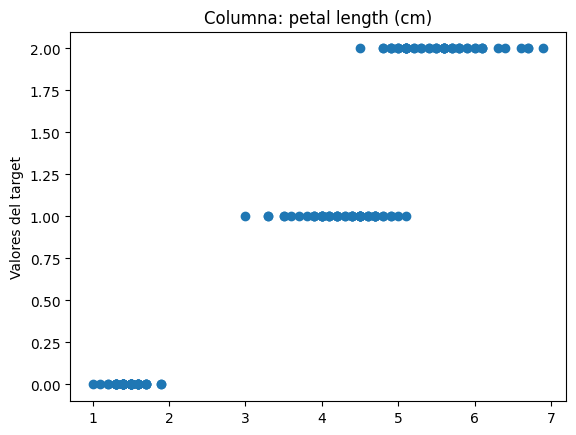

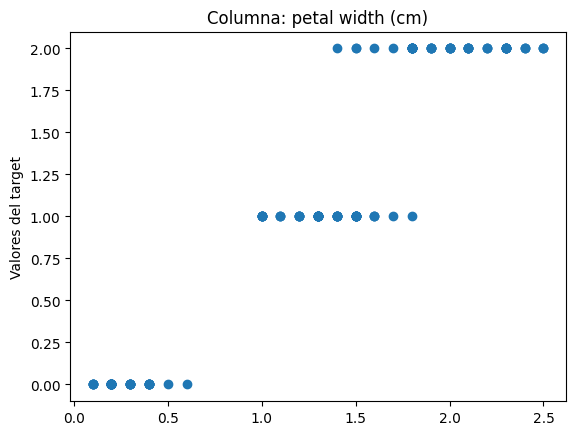

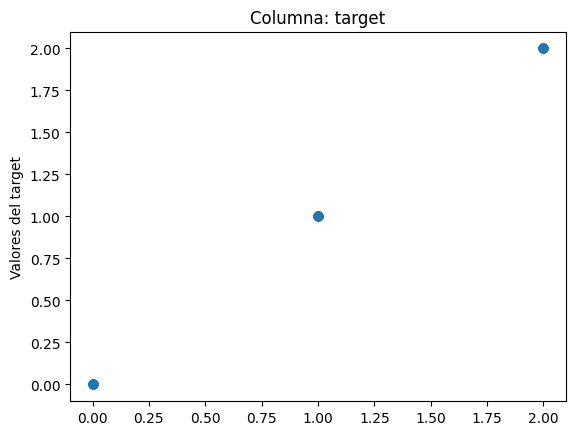

In [55]:
# Diagrama de dispersión respecto al target

for i in df.columns:
    plt.scatter(df[i],df["target"])
    plt.ylabel("Valores del target")
    plt.title(f"Columna: {i}")
    plt.show()

In [56]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Resumiendo

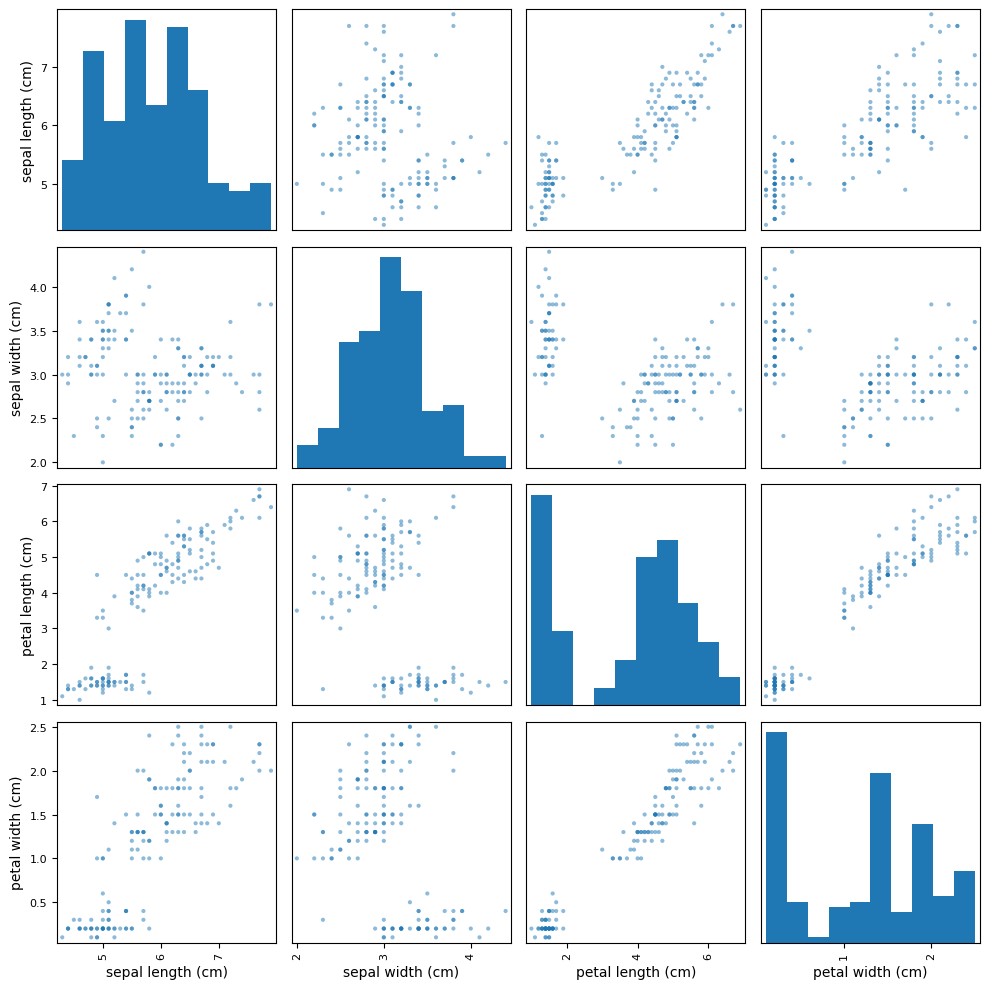

In [57]:
pd.set_option('display.max_columns', None)

fig = pd.plotting.scatter_matrix(df[iris.feature_names], figsize=(10,10))
plt.tight_layout()
plt.show()

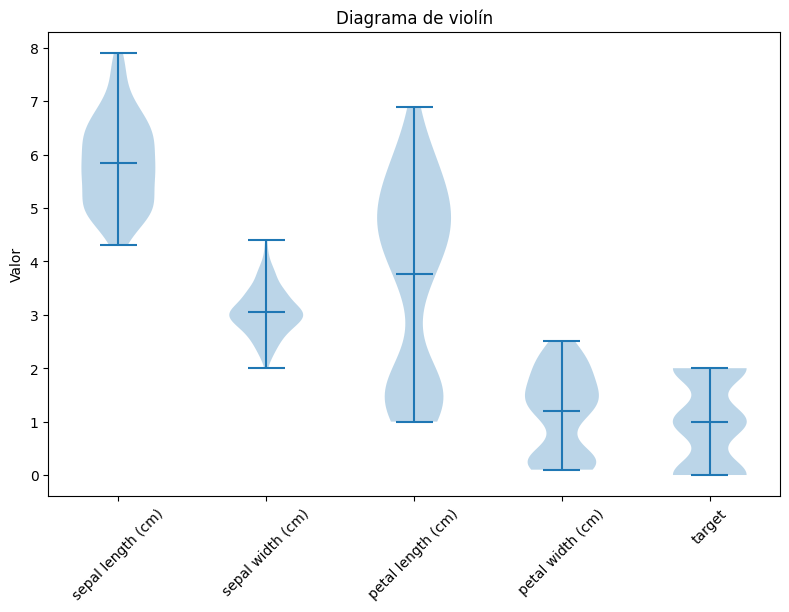

In [58]:
# violinplot
plt.figure(figsize=(8,6))
plt.violinplot(df.values, showmeans=True)
plt.xticks(range(1, len(df.columns)+1), df.columns, rotation=45)
plt.ylabel("Valor")
plt.tight_layout()
plt.title("Diagrama de violín")
plt.show()

### ¿Cómo se relacionan estos?

In [59]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


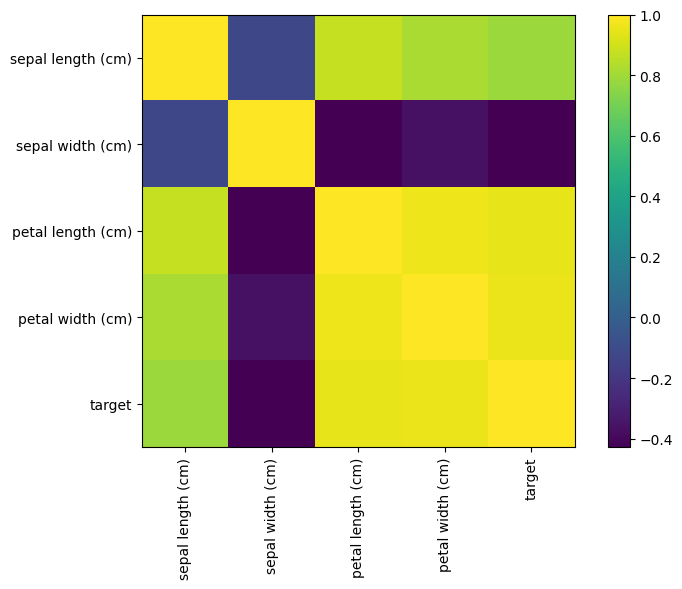

In [60]:
corr = df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr) #, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

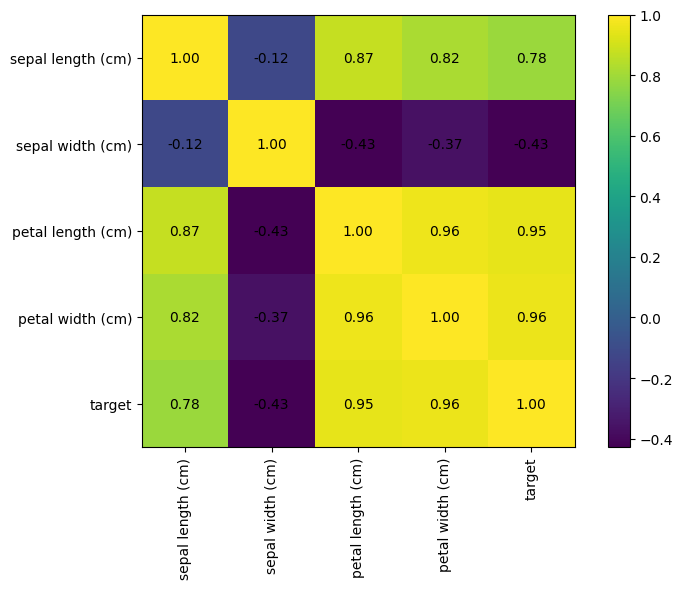

In [61]:
corr = df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

# Agregar los valores numéricos dentro de cada celda
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center')

plt.tight_layout()
plt.show()

## Entrenamiento

### División de los datos

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df[iris.feature_names]
y = df["target"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [65]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2


In [66]:
X_test.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2


In [67]:
y_train.head(3)

,target
130,2
119,2
29,0


In [68]:
y_test.head(3)

,target
72,1
112,2
132,2


### Los "K" vecinos más cercanos

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)

In [71]:
# Entrenamos al modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Predicciones

In [72]:
y_pred = knn.predict(X_test)

In [73]:
knn_predicciones = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred
})

knn_predicciones

,y_test,y_pred
72,1,2
112,2,2
132,2,2
88,1,1
37,0,0
138,2,2
87,1,1
42,0,0
8,0,0
90,1,1


## Métricas

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [76]:
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Matriz de confusión:
 [[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]


In [77]:
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



### Matriz de confusión

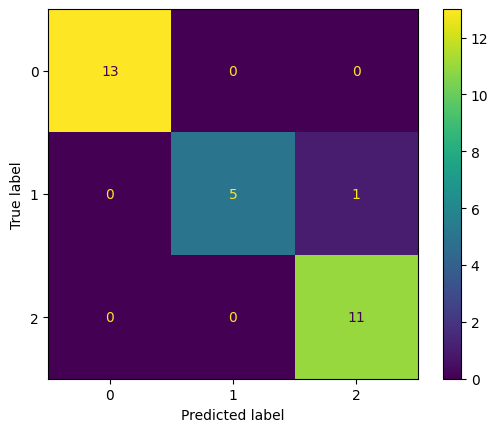

In [78]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### AUC-ROC

#### Convertir a binario (Setosa vs Versicolor)

In [40]:
# Cargar iris
# iris = load_iris()
X = iris.data
y = iris.target

# Convertir a binario sin eliminar datos
# 0 = setosa (positivo), 1 y 2 se vuelven 1 (negativo)
y_binary = (y != 0).astype(int)

In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=184
)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_prob = knn.predict_proba(X_test)[:, 1]

In [ ]:
y_prob

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.])

In [ ]:
y_prob[0] = 0.0
y_prob[5] = 1.0
y_prob

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.])

In [ ]:
# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

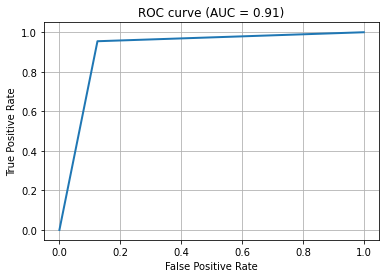

In [ ]:
# Gráfica ROC AUC
plt.figure()
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 0], [1, 1])  # no se especifican colores
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curve (AUC = {roc_auc:.2f})")
plt.grid(True)
plt.show()

## Guardar el modelo

In [79]:
import joblib

In [80]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(knn, 'modelo_iris_knn.pkl')

['modelo_iris_knn.pkl']

In [81]:
# Este archivo se guarda en la carpeta temporal de Colab. Puedes descargarlo así:
from google.colab import files
files.download('modelo_iris_knn.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Actividad:

1. Martes: Desarrolla 2 modelos de clasificación más usando "Arbol de decisión" y "SVM"
2. Jueves: Despliega los 3 modelos (incluyendo knn) en Streamlit.
3. Envía al correo (solo uno por grupo) y anota en el excel compartido tu url.